# Question 1

Constraints: <br>
$ 2x + 3y < 60 $ <br>
$ x > 0 $<br>
$ y > 0 $<br>

Objective function: <br>
Maximize: $ 4x + 5y $

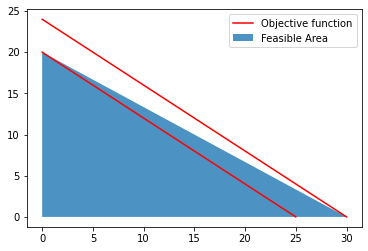

In [1]:
# library
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp

# Create data
x=[30, 0]
y=[0 , 20]

line_1_x = [30, 0]
line_1_y = [0,  24]
line_2_x = [0, 25]
line_2_y = [20, 0]

# Area plot
plt.fill_between(x, y, alpha = 0.8, label = 'Feasible Area')
plt.plot(line_1_x, line_1_y, color = 'red', label = 'Objective function')
plt.plot(line_2_x, line_2_y, color = 'red')
plt.legend()
plt.show()

In [2]:
print("Points at 30 tortes and 0 pies: ", (30 * 4 + 0 * 5))

print("Points at 0 tortes and 20 pies: ", (0 * 4 + 20 * 5))

Points at 30 tortes and 0 pies:  120
Points at 0 tortes and 20 pies:  100


Therefore, the max points possible is 120

Constraints: <br>
$ 2x + 3y < 60 $ <br>
$ x > 0 $<br>
$ y > 0 $<br>
$ y > x $

Objective function: <br>
Maximize: $ 4x + 5y $

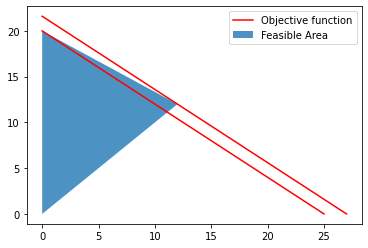

In [3]:
# Create data
x=[0, 0 , 12]
y1=[0, 20, 12]
y2=[0, 0, 12]

line_1_x = [27, 0]
line_1_y = [0,  21.6]
line_2_x = [0, 25]
line_2_y = [20, 0]

# Area plot
plt.fill_between(x, y1, y2, alpha = 0.8, label = 'Feasible Area')
plt.plot(line_1_x, line_1_y, color = 'red', label = 'Objective function')
plt.plot(line_2_x, line_2_y, color = 'red')
plt.legend()
plt.show()

In [4]:
print("Points at 0 tortes and 20 pies: ", (0 * 4 + 20 * 5))
print("Points at 12 tortes and 12 pies: ", (12 * 4 + 12 * 5))

Points at 0 tortes and 20 pies:  100
Points at 12 tortes and 12 pies:  108


Therefore, the max points possible is 108

Decrease in points is 12 (=120-108)

# Question 2

Constraints:<br>
$ 3w + 2c < 1000 $<br>
$ 2w + 4c < 1200 $<br>
$ w + c < 450 $<br>

Objective function: <br>
Maximize: $ 2000w + 3000c $

In [5]:
obj = np.array([2000,3000]) # objective vector
A = np.zeros((3,2)) # initialize constraint matrix
A[0,:] = [3, 2] # labour constraint
A[1,:] = [2, 4] # fertilizer constraint
A[2,:] = [1, 1] # land constraint
b = np.array([1000, 1200, 450])
sense = np.array(['<','<', '<'])

In [6]:
print(A)

[[3. 2.]
 [2. 4.]
 [1. 1.]]


In [7]:
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(2) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0

Academic license - for non-commercial use only - expires 2022-08-21
Using license file C:\Users\singl\gurobi.lic


In [8]:
ojModel.optimize() # solve the LP
ojModel.objVal # optimal solution

1000000.0

In [9]:
ojModX.x

array([200., 200.])

In [10]:
for fertilizer_limit in range(200, 2300, 100):
    b = np.array([1000, fertilizer_limit, 450])
    ojModel = gp.Model() # initialize an empty model

    ojModX = ojModel.addMVar(2) # tell the model how many variables there are
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

    ojModel.Params.OutputFlag = 0

    ojModel.optimize() # solve the LP
    if(ojModX.x[0] == 0):
        limit = fertilizer_limit
        break

In [11]:
print("Minimum fertilizer limit for which wheat will be discontinued -", limit)

Minimum fertilizer limit for which wheat will be discontinued - 1800


# Question 3

Constraints:<br>
$ 11a + 53b + 5c + 5d + 29e < 40 $<br>
$ 3a + 6b + 5c + d + 34e < 20 $<br>
$ a < 1 $<br>
$ b < 1 $<br>
$ c < 1 $<br>
$ d < 1 $<br>
$ e < 1 $<br>

Objective function: <br>
Maximize: $ 13a + 16b + 16c + 14d + 39e $

In [12]:
obj = np.array([13, 16, 16, 14, 39]) # objective vector
A = np.zeros((7, 5)) # initialize constraint matrix
A[0,:] = [11, 53, 5, 5, 29]
A[1,:] = [3, 6, 5, 1, 34]
A[2,:] = [1, 0, 0, 0, 0]
A[3,:] = [0, 1, 0, 0, 0]
A[4,:] = [0, 0, 1, 0, 0]
A[5,:] = [0, 0, 0, 1, 0]
A[6,:] = [0, 0, 0, 0, 1]
b = np.array([40, 20, 1, 1, 1, 1, 1])
sense = np.array(['<','<', '<','<', '<','<', '<'])

In [13]:
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(5) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0

In [14]:
ojModel.optimize() # solve the LP
ojModel.objVal # optimal solution

57.449017199017206

In [15]:
print("Oppurtunity 3 -", round(ojModX.x[2],2))

Oppurtunity 3 - 1.0


# Question 4

Constraints:<br>
$ 72x + 121y + 65z < 2250 $<br>
$ 72x + 121y + 65z > 2000 $<br>
$ 107x + 500y > 5000 $<br>
$ 107x + 500y < 50000 $<br>
$ x < 10 $<br>
$ y < 10 $<br>
$ z < 10 $<br>

Objective function: <br>
Minimize: $ 0.18x + 0.23y + 0.05z $

In [22]:
obj = np.array([0.18, 0.23, 0.05]) # objective vector
A = np.zeros((7, 3)) # initialize constraint matrix
A[0,:] = [72, 121, 65]
A[1,:] = [72, 121, 65]
A[2,:] = [107, 500, 0]
A[3,:] = [107, 500, 0]
A[4,:] = [1, 0, 0]
A[5,:] = [0, 1, 0]
A[6,:] = [0, 0, 1]
b = np.array([2250, 2000, 5000, 50000, 10, 10, 10])
sense = np.array(['<','>', '>','<', '<', '<', '<'])

In [23]:
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(3) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0

In [26]:
ojModel.optimize() # solve the LP
ojModel.objVal # optimal solution

3.1500000000000004

In [27]:
print("Corn -", round(ojModX.x[0],2))

Corn - 1.94


# Question 5

Constraints:<br>

$ x_1 + y_1 > 1.2 $<br>
$ x_1 + y_1 < 2 $<br>
$ 1.3x_2 + 1.2y_2 > 1.5 $<br>
$ 1.3x_2 + 1.2y_2 < 2 $<br>
$ 1.4x_3 + 1.6y_3 > 2 $<br>
$ 1.4x_3 + 1.6y_3 < 3 $<br>
$ x_1 + x_2 + x_3 < 2 $<br>
$ y_1 + y_2 + y_3 < 3 $<br>

Objective function: <br>
Maximize: $ x_1 + 1.3x_2 + 1.4x_3 + y_1 + 1.2y_2 + 1.6y_3$

In [71]:
obj = np.array([1, 1.3, 1.4, 1, 1.2, 1.6]) # objective vector
A = np.zeros((8,6)) # initialize constraint matrix
A[0,:] = [1, 0, 0, 1, 0, 0]
A[1,:] = [1, 0, 0, 1, 0, 0]
A[2,:] = [0, 1.3, 0, 0, 1.2, 0]
A[3,:] = [0, 1.3, 0, 0, 1.2, 0]
A[4,:] = [0, 0, 1.4, 0, 0, 1.6]
A[5,:] = [0, 0, 1.4, 0, 0, 1.6]
A[6,:] = [1, 1, 1, 0, 0, 0]
A[7,:] = [0, 0, 0, 1, 1, 1]
b = np.array([1.2, 2, 1.5, 2, 2, 3, 2, 3])
sense = np.array(['>','<', '>', '<', '>', '<', '<', '<'])

In [72]:
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(6) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0

In [73]:
ojModel.optimize() # solve the LP
ojModel.objVal # optimal solution

6.586538461538462

In [78]:
print("In year 3, forest unit 2 should cut down -", round(ojModX.x[5], 2))

In year 3, forest unit 2 should cut down - 1.88
